In [23]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import (r2_score,
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error)
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
import seaborn as sns

In [24]:
exoplanets = pd.read_csv("exoplanets_clean.csv")

In [25]:
## Remove the same variable as the base random forest. 
stellar_features = [
    'stellar_effective_temp_k',
    'stellar_radius_solar_radius',
    'stellar_mass_solar_mass',
    'stellar_metallicity_dex',
    'stellar_luminosity_log_solar',
    'stellar_surface_gravity_log10_cms2',
    'stellar_age_gyr',
    'stellar_rotational_period_days',
    'systemic_radial_velocity_kms']

planetary_targets = [
    'planet_mass_earth_mass',
    'planet_radius_earth_radius',
    'orbital_period_days',
    'orbit_semi_major_axis_au',
    'planet_density_gcm3']


In [26]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for target in planetary_targets:
    df = exoplanets[stellar_features + [target]].copy()
    df = df.dropna(subset=[target]) 

    X = df[stellar_features].values
    y = df[target].values
    
    # Replace RandomForestRegressor with GradientBoostingRegressor
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                      max_depth=3, random_state=42)

    r2_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        imputer = SimpleImputer(strategy='median')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

        model.fit(X_train_imputed, y_train)
        preds = model.predict(X_test_imputed)
        r2_scores.append(r2_score(y_test, preds))

    print(f"\nTarget: {target}")
    print(f"Average R² score: {np.mean(r2_scores):.4f}")
    print(f"R² scores per fold: {np.round(r2_scores, 4)}")


Target: planet_mass_earth_mass
Average R² score: 0.2602
R² scores per fold: [0.2025 0.3176 0.3376 0.3165 0.1926 0.3758 0.1727 0.2129 0.1869 0.2869]

Target: planet_radius_earth_radius
Average R² score: 0.4196
R² scores per fold: [0.1926 0.4173 0.4075 0.4849 0.4416 0.467  0.4393 0.426  0.4226 0.4967]

Target: orbital_period_days
Average R² score: -9475988.8170
R² scores per fold: [ 3.19500000e-01 -1.50000000e-03 -3.78794000e+01  9.00000000e-03
  6.64700000e-01 -5.42500000e-01 -6.79800000e-01 -4.98595000e+01
 -9.47549866e+07 -4.81360290e+03]

Target: orbit_semi_major_axis_au
Average R² score: -11.3235
R² scores per fold: [ 8.90000e-02 -1.27000e-02 -1.72769e+01  1.26000e-02  5.92000e-02
 -2.79540e+00 -9.13946e+01 -1.66010e+00 -1.70600e-01 -8.59000e-02]

Target: planet_density_gcm3
Average R² score: -3.7843
R² scores per fold: [-6.08430e+00 -3.44390e+00 -2.10000e-03 -6.79900e-01 -1.23000e-02
  3.04700e-01 -2.58118e+01  7.50000e-03 -1.64800e-01 -1.95590e+00]


In [30]:
exoplanets_derived = exoplanets.copy()

# V ∝ M / ρ
exoplanets_derived['mass_density_ratio'] = exoplanets['stellar_mass_solar_mass'] / exoplanets['stellar_density_gcm3']

derived_features = ['mass_density_ratio']

# Identify features
stellar_features = [
    'stellar_effective_temp_k',
    'stellar_radius_solar_radius',
    'stellar_mass_solar_mass',
    'stellar_metallicity_dex',
    'stellar_luminosity_log_solar',
    'stellar_surface_gravity_log10_cms2',
    'stellar_age_gyr',
    'stellar_rotational_period_days',
    'systemic_radial_velocity_kms']

# Identify targets
planetary_targets = [
    'planet_mass_earth_mass',
    'planet_radius_earth_radius',
    'orbital_period_days',
    'orbit_semi_major_axis_au',
    'planet_density_gcm3']

# Combine features
all_features = stellar_features + derived_features

In [31]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for target in planetary_targets:
    df = exoplanets_derived[all_features + [target]].copy()
    df = df.dropna(subset=[target]) 

    X = df[all_features].values
    y = df[target].values

    model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42)

    r2_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        imputer = SimpleImputer(strategy='median')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

        model.fit(X_train_imputed, y_train)
        preds = model.predict(X_test_imputed)
        r2_scores.append(r2_score(y_test, preds))

    print(f"\nTarget: {target}")
    print(f"Average R² score: {np.mean(r2_scores):.4f}")
    print(f"R² scores per fold: {np.round(r2_scores, 4)}")


Target: planet_mass_earth_mass
Average R² score: 0.2508
R² scores per fold: [0.1772 0.3105 0.3345 0.3084 0.2176 0.3553 0.1633 0.1994 0.1681 0.2738]

Target: planet_radius_earth_radius
Average R² score: 0.4292
R² scores per fold: [0.2026 0.4281 0.4104 0.483  0.4529 0.4847 0.4555 0.4367 0.4271 0.5112]

Target: orbital_period_days
Average R² score: -9480256.7966
R² scores per fold: [ 1.66600000e-01 -1.80000000e-03 -5.95907000e+01  1.40000000e-02
  7.12100000e-01 -3.86000000e-02 -2.97000000e-02 -5.72226000e+01
 -9.47976382e+07 -4.81375860e+03]

Target: orbit_semi_major_axis_au
Average R² score: -11.2410
R² scores per fold: [ 1.40700e-01  8.40000e-03 -1.58085e+01  9.70000e-03  7.60000e-02
 -3.11560e+00 -9.26677e+01 -7.24800e-01 -2.13500e-01 -1.14500e-01]

Target: planet_density_gcm3
Average R² score: -3.3103
R² scores per fold: [-1.85740e+00 -3.92230e+00 -2.00000e-03 -1.31500e+00 -1.43000e-02
 -1.60390e+00 -2.22259e+01  4.48000e-02 -1.29900e-01 -2.07740e+00]


In [32]:
planetary_targets = ['planet_radius_earth_radius']


Target: planet_radius_earth_radius
Average R-squared: 0.4820
Average MAE: 2.6252
Average RMSE: 3.8129
Average Median AE: 1.6716


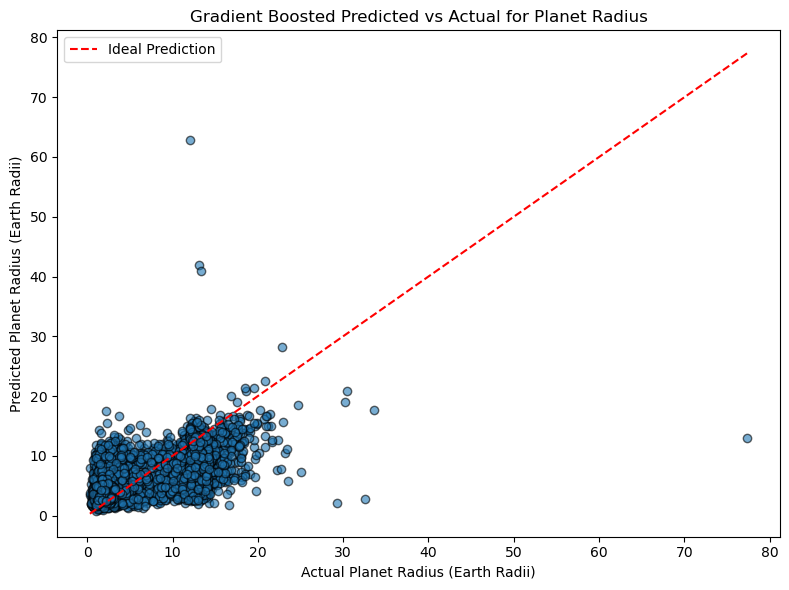

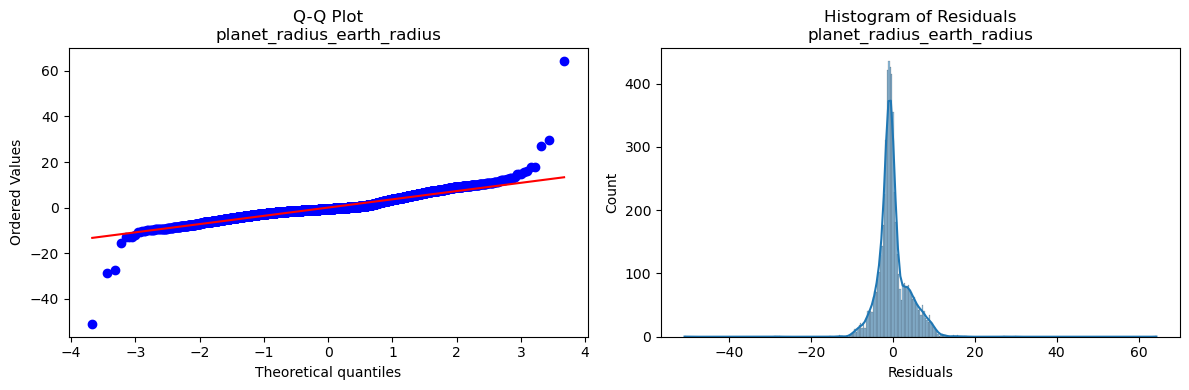

In [33]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for target in planetary_targets:
    df = exoplanets_derived[all_features + [target]].copy()
    df = df.dropna(subset=[target])

    X = df[all_features].values
    y = df[target].values

    model = GradientBoostingRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=5,
        subsample=0.8,
        random_state=42)

    predicts = []
    actuals = []
    r2_scores = []
    mae_scores = []
    rmse_scores = []
    medae_scores = []
    residuals = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        imputer = SimpleImputer(strategy='median')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

        model.fit(X_train_imputed, y_train)
        preds = model.predict(X_test_imputed)
        predicts.extend(preds)
        actuals.extend(y_test)

        r2_scores.append(r2_score(y_test, preds))
        mae_scores.append(mean_absolute_error(y_test, preds))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, preds)))
        medae_scores.append(median_absolute_error(y_test, preds))
        residuals.extend(y_test - preds)            

    print(f"\nTarget: {target}")
    print(f"Average R-squared: {np.mean(r2_scores):.4f}")
    print(f"Average MAE: {np.mean(mae_scores):.4f}")
    print(f"Average RMSE: {np.mean(rmse_scores):.4f}")
    print(f"Average Median AE: {np.mean(medae_scores):.4f}")


    plt.figure(figsize=(8, 6))
    plt.scatter(actuals, predicts, alpha=0.6, edgecolors='k')
    plt.plot([min(actuals), max(actuals)],
         [min(actuals), max(actuals)],
         color='red', linestyle='--', label='Ideal Prediction')
    plt.xlabel('Actual Planet Radius (Earth Radii)')
    plt.ylabel('Predicted Planet Radius (Earth Radii)')
    plt.title('Gradient Boosted Predicted vs Actual for Planet Radius')
    plt.legend()
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    stats.probplot(residuals, dist="norm", plot=axs[0]) # Plot a probplot QQ since our quantities are different scales
    # https://stats.stackexchange.com/questions/585566/what-are-the-main-difference-between-a-qq-plot-and-a-probability-plot-for-measur
    axs[0].set_title(f"Q-Q Plot\n{target}") # Label each graph with the target

    sns.histplot(residuals, kde=True, ax=axs[1]) # Plot a histogram of the residuals with a kde curve overlaid https://python-graph-gallery.com/20-basic-histogram-seaborn/
    axs[1].set_title(f"Histogram of Residuals\n{target}") # Label each graph with the target
    axs[1].set_xlabel("Residuals")

    plt.tight_layout()
    plt.show()

In [34]:
train_pred = model.predict(X_train_imputed)
test_pred = model.predict(X_test_imputed)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")

Train MSE: 8.246
Test MSE: 10.726


In [ ]:
param_grid = {
    "n_estimators": [150, 500, 1000],
    "max_depth": [3, 5, 9],
    "learning_rate": [0.01, 0.05, 0.07],
    "subsample": [0.7, 0.8]}

# Set up grid search with GradientBoostingRegressor
grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1)

grid_search.fit(X, y)

print("Best params:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)


Target: planet_radius_earth_radius
Average R-squared: 0.4948
Average MAE: 2.6334
Average RMSE: 3.7769
Average Median AE: 1.6868


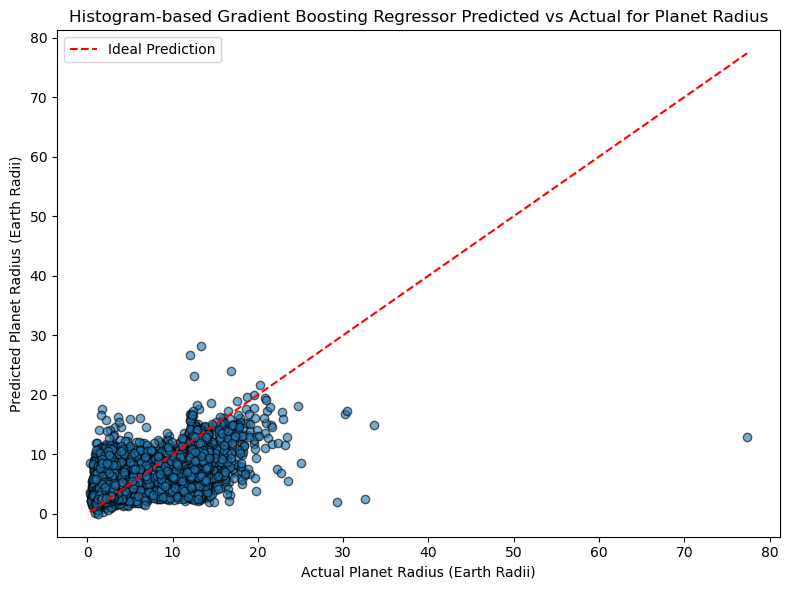

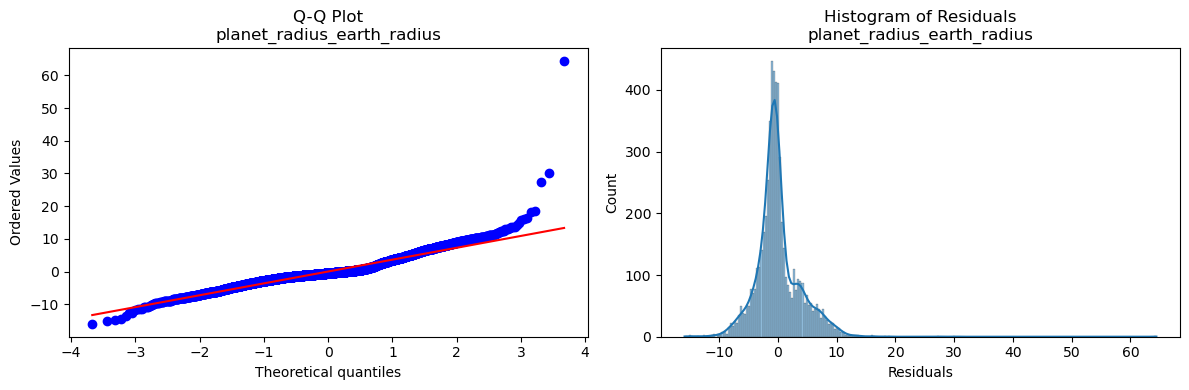

In [35]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for target in planetary_targets:
    df = exoplanets_derived[all_features + [target]].copy()
    df = df.dropna(subset=[target]) 

    X = df[all_features].values
    y = df[target].values

    model = HistGradientBoostingRegressor(
        max_iter=1000,
        learning_rate=0.01,
        max_depth=5,
        l2_regularization=0.0,
        early_stopping=False,
        random_state=42)

    predicts = []
    actuals = []

    r2_scores = []
    mae_scores = []
    rmse_scores = []
    medae_scores = []
    residuals = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        predicts.extend(preds)
        actuals.extend(y_test)

        r2_scores.append(r2_score(y_test, preds))
        mae_scores.append(mean_absolute_error(y_test, preds))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, preds)))
        medae_scores.append(median_absolute_error(y_test, preds))
        residuals.extend(y_test - preds)            


    print(f"\nTarget: {target}")
    print(f"Average R-squared: {np.mean(r2_scores):.4f}")
    print(f"Average MAE: {np.mean(mae_scores):.4f}")
    print(f"Average RMSE: {np.mean(rmse_scores):.4f}")
    print(f"Average Median AE: {np.mean(medae_scores):.4f}")

    plt.figure(figsize=(8, 6))
    plt.scatter(actuals, predicts, alpha=0.6, edgecolors='k')
    plt.plot([min(actuals), max(actuals)],
             [min(actuals), max(actuals)],
             color='red', linestyle='--', label='Ideal Prediction')
    plt.xlabel('Actual Planet Radius (Earth Radii)')
    plt.ylabel('Predicted Planet Radius (Earth Radii)')
    plt.title('Histogram-based Gradient Boosting Regressor Predicted vs Actual for Planet Radius')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    stats.probplot(residuals, dist="norm", plot=axs[0]) # Plot a probplot QQ since our quantities are different scales
    # https://stats.stackexchange.com/questions/585566/what-are-the-main-difference-between-a-qq-plot-and-a-probability-plot-for-measur
    axs[0].set_title(f"Q-Q Plot\n{target}") # Label each graph with the target

    sns.histplot(residuals, kde=True, ax=axs[1]) # Plot a histogram of the residuals with a kde curve overlaid https://python-graph-gallery.com/20-basic-histogram-seaborn/
    axs[1].set_title(f"Histogram of Residuals\n{target}") # Label each graph with the target
    axs[1].set_xlabel("Residuals")

    plt.tight_layout()
    plt.show()

In [36]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")

Train MSE: 10.580
Test MSE: 10.839
